In [5]:
import tensorflow.keras
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
print("Hello world")

Hello world


In [6]:
path = 'E:\Semester 6\Machine Learning\machine-learning-techniques\Data\image1'

In [ ]:
train_data, test_data = image_dataset_from_directory(
    path,
)
train_data

Found 180 files belonging to 2 classes.
Using 126 files for training.
Using 54 files for validation.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
iterator = dataset.take(1).as_numpy_iterator()

images = iterator.next()
images

(array([[[[1.07742188e+02, 7.57421875e+01, 6.07421875e+01],
          [1.18335938e+02, 8.65585938e+01, 7.08906250e+01],
          [1.24855469e+02, 9.38554688e+01, 7.58554688e+01],
          ...,
          [1.42515625e+02, 1.03515625e+02, 8.72578125e+01],
          [1.41667969e+02, 1.03445312e+02, 8.48906250e+01],
          [1.43777344e+02, 1.03000000e+02, 8.49257812e+01]],
 
         [[1.08245804e+02, 7.64241028e+01, 6.13646698e+01],
          [1.14954514e+02, 8.54012146e+01, 6.91107635e+01],
          [1.20554398e+02, 9.14531250e+01, 7.25616302e+01],
          ...,
          [1.41805557e+02, 1.02805557e+02, 8.59534149e+01],
          [1.41311371e+02, 1.03088715e+02, 8.45340271e+01],
          [1.40811951e+02, 1.02258652e+02, 8.34430847e+01]],
 
         [[1.07752701e+02, 7.78305359e+01, 6.21379242e+01],
          [1.13667099e+02, 8.46670990e+01, 6.82217865e+01],
          [1.17480469e+02, 8.88515625e+01, 6.97382812e+01],
          ...,
          [1.39204910e+02, 1.00204910e+02, 8.3204

In [33]:
images[0][0]

array([[[107.74219 ,  75.74219 ,  60.742188],
        [118.33594 ,  86.55859 ,  70.890625],
        [124.85547 ,  93.85547 ,  75.85547 ],
        ...,
        [142.51562 , 103.515625,  87.25781 ],
        [141.66797 , 103.44531 ,  84.890625],
        [143.77734 , 103.      ,  84.92578 ]],

       [[108.245804,  76.4241  ,  61.36467 ],
        [114.95451 ,  85.401215,  69.11076 ],
        [120.5544  ,  91.453125,  72.56163 ],
        ...,
        [141.80556 , 102.80556 ,  85.953415],
        [141.31137 , 103.088715,  84.53403 ],
        [140.81195 , 102.25865 ,  83.443085]],

       [[107.7527  ,  77.830536,  62.137924],
        [113.6671  ,  84.6671  ,  68.22179 ],
        [117.48047 ,  88.85156 ,  69.73828 ],
        ...,
        [139.20491 , 100.20491 ,  83.20491 ],
        [140.62775 , 102.40509 ,  83.8504  ],
        [140.07422 , 101.455826,  83.69261 ]],

       ...,

       [[160.11887 , 174.11887 , 176.4548  ],
        [159.2021  , 172.75592 , 175.09099 ],
        [184.00914 , 1

In [34]:
images[1][0]

1

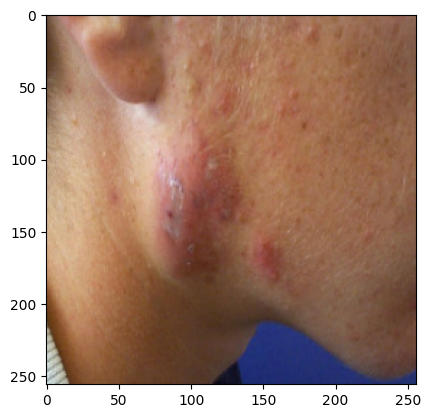

In [35]:
import matplotlib.pyplot as plt 

plt.imshow(images[0][0].astype('uint8'))

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [47]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Flatten(), 
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [48]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

In [56]:
history = model.fit(train_data, epochs=10)


Epoch 1/10
4/4 [==============================] - 1s 84ms/step - loss: 49.7728 - accuracy: 0.5714
Epoch 2/10
4/4 [==============================] - 0s 46ms/step - loss: 43.5928 - accuracy: 0.6429
Epoch 3/10
4/4 [==============================] - 0s 45ms/step - loss: 26.1679 - accuracy: 0.6825
Epoch 4/10
4/4 [==============================] - 0s 44ms/step - loss: 17.4769 - accuracy: 0.6825
Epoch 5/10
4/4 [==============================] - 0s 46ms/step - loss: 7.3839 - accuracy: 0.7778
Epoch 6/10
4/4 [==============================] - 0s 45ms/step - loss: 4.6909 - accuracy: 0.7937
Epoch 7/10
4/4 [==============================] - 0s 44ms/step - loss: 4.0835 - accuracy: 0.8571
Epoch 8/10
4/4 [==============================] - 0s 45ms/step - loss: 2.8513 - accuracy: 0.8889
Epoch 9/10
4/4 [==============================] - 0s 45ms/step - loss: 1.1518 - accuracy: 0.9444
Epoch 10/10
4/4 [==============================] - 0s 45ms/step - loss: 0.2149 - accuracy: 0.9683


In [57]:
loss, accuracy = model.evaluate(test_data)
loss, accuracy

2/2 [==============================] - 1s 150ms/step - loss: 4.0892 - accuracy: 0.8333


(4.089157581329346, 0.8333333134651184)

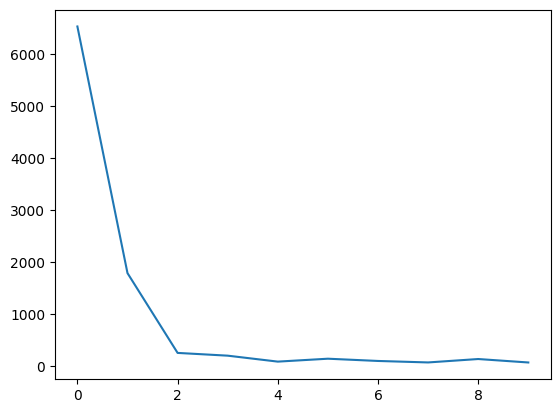

In [51]:
plt.plot(history.history['loss'])

In [63]:
images = []
classes = []
for image_batch, class_batch in test_data:
    _images = image_batch.numpy()
    _classes = class_batch.numpy()
    images.extend(_images)
    classes.extend(_classes)
classes



[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [76]:
import numpy as np
image_batch = np.expand_dims(images[0],axis=0)

prediction = model.predict(image_batch)
prediction

1/1 [==============================] - 0s 30ms/step


array([[6.368042e-29]], dtype=float32)

In [80]:
np.round(prediction[0][0])

0.0

ValueError: in user code:

    File "c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ahmed\miniconda3\envs\tf_env\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(32, 256, 3)


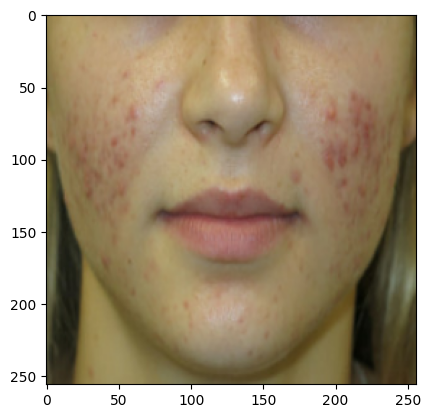

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select the image to predict
image_to_predict = images[0]

# Display the image
plt.imshow(image_to_predict.astype('uint8'))
plt.title("Image to Predict")
plt.show()

# Add a batch dimension (shape becomes (1, 256, 256, 3))
image_batch = np.expand_dims(image_to_predict, axis=0)

# Make prediction
prediction = model.predict(image_batch)

# Assuming binary classification (sigmoid output), print the raw prediction
print(f"Raw prediction output: {prediction[0][0]}")

# Get class names (defined in cell 17, using train_data from cell 4)
class_names = train_data.class_names

# Determine predicted class
predicted_class_index = int(np.round(prediction[0][0])) # Round sigmoid output to 0 or 1
predicted_class_name = class_names[predicted_class_index]
print(f"Predicted class: {predicted_class_name} (Index: {predicted_class_index})")

# Get actual class (using 'classes' list from cell 15)
actual_class_index = classes[0]
actual_class_name = class_names[actual_class_index]
print(f"Actual class: {actual_class_name} (Index: {actual_class_index})")

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Get class names from the dataset
# train_data was created using image_dataset_from_directory which has a class_names attribute
class_names = train_data.class_names
num_classes = len(class_names)
print(f"Classes found: {class_names}")

# Dictionary to store one image per class index
class_images = {}
found_classes = set()

# Iterate through the training data to find one image per class
# We iterate through the dataset batch by batch
for images_batch, labels_batch in train_data:
    # Convert batch tensors to numpy arrays
    images_np = images_batch.numpy()
    labels_np = labels_batch.numpy()

    # Iterate through images and labels in the current batch
    for img, label_idx in zip(images_np, labels_np):
        # Check if we already found an image for this class
        if label_idx not in found_classes:
            # Store the image (convert to uint8 for display) and mark class as found
            class_images[label_idx] = img.astype(np.uint8)
            found_classes.add(label_idx)
            print(f"Found image for class: {class_names[label_idx]} (Index: {label_idx})")

        # Check if we have found an image for each class
        if len(found_classes) == num_classes:
            break # Stop searching within the batch

    # Check if we have found an image for each class after processing the batch
    if len(found_classes) == num_classes:
        break # Stop iterating through batches

# Display the images
if len(class_images) < num_classes:
    print(f"\nWarning: Only found images for {len(class_images)} out of {num_classes} classes.")
elif num_classes > 0:
    print(f"\nDisplaying one image per class:")
    plt.figure(figsize=(5 * num_classes, 5))
    i = 1
    # Sort items by class index for consistent display order
    sorted_items = sorted(class_images.items())
    for label_idx, img in sorted_items:
        plt.subplot(1, num_classes, i)
        plt.imshow(img)
        plt.title(f'Class: {class_names[label_idx]}')
        plt.axis('off')
        i += 1
    plt.show()
else:
    print("\nNo classes or images found in the dataset.")